In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go

In [2]:
dataInsurance = pd.read_excel('/content/TravelInsurancePrediction.xlsx')

In [3]:
dataInsurance.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [4]:
# Drop unnamed column
dataInsurance.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
dataInsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


## **Observation**
As per analysis here I have not found any null value.


The data types of fields are as follows:

<center>

|**Field Name**|**Data Types**|
|--------------|--------------|
|Age|Numerical|
|Employment Type|Categorical|
|GraduateOrNot|Categorical|
|AnnualIncome|Numerical|
|FamilyMembers|Numerical|
|ChronicDiseases|Numerical|
|FrequentFlyer|Categorical|
|EverTravelledAbroad|Categorical|
|TravelInsurance|Numerical|

<center>

In [6]:
dataInsurance.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [7]:
dataInsurance.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

## **Observation**
There are no such missing value in the Dataset

In [8]:
dataInsurance.shape

(1987, 9)

## **Observation**

As per analysis I have found total 1987 numbers of records and 9 columns in the dataset

In [9]:
fig = px.histogram(dataInsurance, x = "Age", color="Age")
fig.update_layout(bargap = 0.2)
fig.show()

## **Observation**

The majority of participants are 28 years old, while the minority are 35 years old.

In [10]:
aveAge = dataInsurance.groupby('Age')
tempDataFrame = aveAge.mean().reset_index()
px.bar(tempDataFrame, x='Age', y='AnnualIncome', title ='Average income by age')

## **Observation**

Participants aged 32 had the lowest average income while those aged 25 had the highest average income.

In [11]:
fig = px.histogram(dataInsurance,y='GraduateOrNot', height = 400, width = 600)
fig.update_layout(bargap=0.2)


## **Observation**

Maximum numbers of participates are Graduate

In [12]:
fig = px.histogram(dataInsurance, x = 'AnnualIncome', width =800, height = 400)
fig.update_layout(bargap=0.2)

## **Observation**

800K is the highest annual income for 153 participants

In [13]:
fig=px.histogram(dataInsurance, x= 'FamilyMembers', width = 800, height = 400)
fig.update_layout(bargap=0.2)

## **Observation**

The highest number of families with four members is 505 at most.

In [14]:
fig = px.histogram(dataInsurance, y= 'ChronicDiseases', width = 800, height = 400)
fig.update_layout(bargap = 0.2)


## **Observation**

There are no such chronic diseases for the majority of families.

In [15]:
fig=px.histogram(dataInsurance,x='FrequentFlyer', width = 600, height = 400)
fig.update_layout(bargap=0.2)

## **Observation**

471 family members were frequent flyers, which is the lowest number.

In [16]:
# EverTravelledAbroad

fig=px.histogram(dataInsurance,x= 'EverTravelledAbroad', width=800, height = 400)
fig.update_layout_images(bargap = 0.2)

## **Observation**

Just 380 participants went abroad.

In [17]:
fig = px.histogram(dataInsurance, x = 'TravelInsurance', width= 600, height = 600, title = 'Graphical representation of Travel Insurance')
fig.update_layout(bargap=0.2)

## **Observation**

Maximum numbers of participant are not covered by insurance

In [18]:
rpt = dataInsurance['Employment Type'].value_counts()
fig = px.pie(dataInsurance,names=rpt.index,values=rpt.values)
fig.show()

## **Observation**

The majority of participants are private sector employee or self employed



---


### ***Government Sector  vs  GraduateOrNot***

---



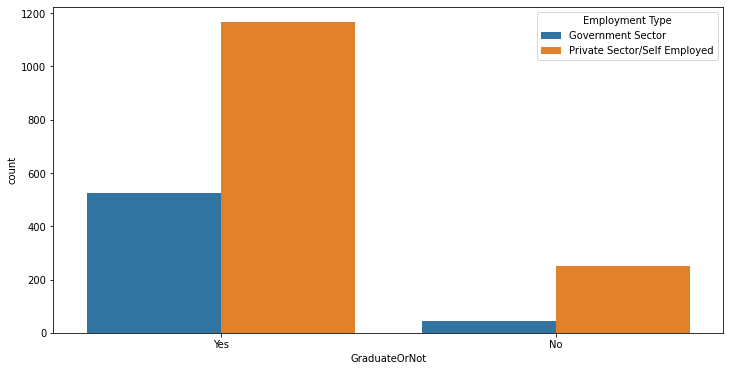

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data=dataInsurance, x = 'GraduateOrNot', hue='Employment Type')
plt.show()

In [20]:
px.histogram(dataInsurance, 
             x='AnnualIncome', 
             color='TravelInsurance', 
             title='Role of annual income in purchasing travel insurance',
              # template='plotly_dark'
            )

In [21]:
px.histogram(dataInsurance, x='FamilyMembers', color='TravelInsurance', 
             title = 'Role of number of family members in purchasing travel insurance')

In [22]:
px.histogram(dataInsurance,x='EverTravelledAbroad',color = 'TravelInsurance',
             title='Role of number of people who have travelled abroad or not purchasing travel insurance')

In [23]:
px.histogram(dataInsurance, x='FrequentFlyer', color = 'TravelInsurance',
              title = 'Role of number of people who are frequent flyers or not in purchasing travel insurance')

In [24]:
px.histogram(dataInsurance, x= 'Age', color = 'TravelInsurance',
             title = 'Role of age in purchasing travel insurance')

In [25]:
px.histogram(dataInsurance,x='GraduateOrNot', color='TravelInsurance',
             title ='Role of education in purchasing travel insurance')

In [26]:
px.histogram(dataInsurance,x='ChronicDiseases', color='TravelInsurance',
             title = 'Role of health in purchasing travel insurance')

**Check total people whose Annual Income is greater than 1.5M**


In [27]:
# dataInsurance['AnnualIncome'].loc[dataInsurance['AnnualIncome'] > 1500000].count()
 

63